
# Statistics Assignment #1: Nick Crawford

### Readme
> This assignment is written in Python using the data analysis libaries NumPy and Pandas.
> This document is static and cannot be edited. To run this interactively, 
> you can download the .ipynb file and upload it onto https://tmpnb.org/
> From there you can interact with the data and the functions.
> You can also run the code natively with the anaconda package

In [1]:
# Import the necessary libaries for data analysis
%matplotlib inline
import pandas as pd
import seaborn as sns

# Function to read csv with choosen delimiter 
data = pd.read_csv('Airbnb_user_sessions copy.csv', delimiter="|")

In [2]:
data.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


In [172]:
# Convert timestamp columns from string into python datetime objects.
data['ts_min'] = pd.to_datetime(data['ts_min'])
data['ts_max'] = pd.to_datetime(data['ts_max'])
data['ds'] = pd.to_datetime(data['ds'])

## Question 1
1) Determine how many unique users are represented in this sample.

In [128]:
# The data table is seperated into a list of groups of data, based on the column name "id_visitor".
# The size of this list of groups represents the number of unique users in the sample.

total_rows = len(data.index)
unique_users = len(data.groupby("id_visitor"))

print "Total Rows: {} \nUnique Users: {}".format(total_rows, unique_users)

Total Rows: 7756 
Unique Users: 630


## Question 2
2) Determine the proportion of sessions that result in a booking request being sent.

In [129]:
# Find all rows when 'next_sent_booking_request' column was greater than 0 (True).

total_booking_request = len(data.loc[data['next_sent_booking_request'] > 0])
booking_percent = (total_booking_request/float(total_rows))*100

print "Number of booking requests: {} \nPercentage of requests that result in booking: %{:.2f}" \
    .format(total_booking_request, booking_percent)

Number of booking requests: 138 
Percentage of requests that result in booking: %1.78


## Question 3
3) Using the “dim_device_app_combo” data:
- Determine the proportion of sessions where an iPad was the device employed by the user. 
- Construct a histogram showing the frequency distribution of devices employed by users.

In [130]:
# Look for all rows whose "dim_device_app_combo" col contains the word iPad.

total_ipads = len(data.loc[data['dim_device_app_combo'].str.contains("iPad")])

print "Number of iPads used: {} \nPercentage of devices that were ipads: %{:.2f}" \
    .format(total_ipads, (total_ipads/float(total_rows))*100)

Number of iPads used: 534 
Percentage of devices that were ipads: %6.88


In [131]:
#frequency distribution
graph = (data.groupby('dim_device_app_combo').size()).sort_values()
print graph

dim_device_app_combo
Android Tablet - Moweb         2
Android Tablet - Android      14
Android Phone - Moweb         72
Android Phone - Web          112
iPad - iOS                   121
Unknown - Moweb              122
Other - Other                267
Android Tablet - Web         299
Desktop - Firefox            327
iPad - Web                   413
Desktop - IE                 429
iPhone - Moweb               429
Desktop - Safari             443
Android Phone - Android      451
iPhone - Web                 944
Desktop - Chrome            1181
iPhone - iOS                2130
dtype: int64


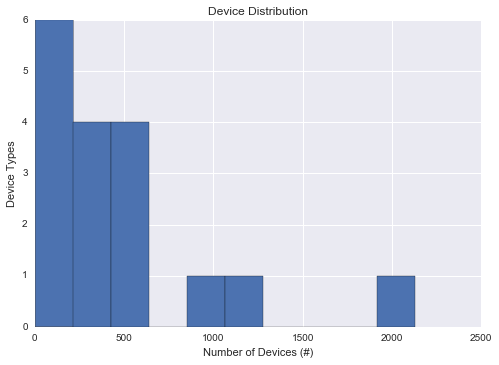

In [132]:
plot1 = graph.hist()
plot1.set_title("Device Distribution")
plot1.set_xlabel("Number of Devices (#)")
plot1.set_ylabel("Device Types")

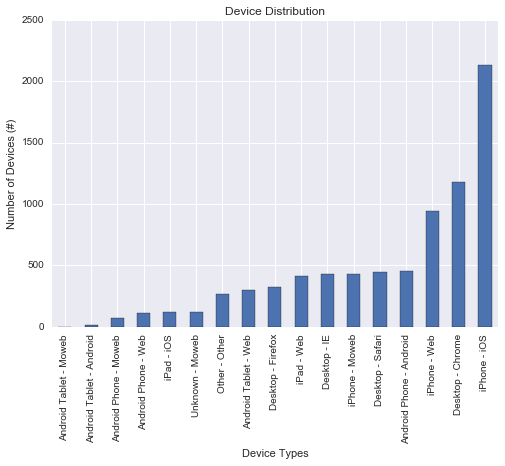

In [168]:
# bar chat is also helpful for visualizing

plot2 = graph.plot.bar()
plot2.set_title("Device Distribution")
plot2.set_xlabel("Device Types")
plot2.set_ylabel("Number of Devices (#)")

## Question 4
4) Using the “ts_min” and “ts_max” data:
- Determine the duration of each session in minutes. 
- Describe the method used, including any data manipulation or filtering.
- Compute the mean, median, mode, and the 90th percentile of the session durations in minutes. 
- Compute the standard deviation and variance of the session durations in minutes.
- Construct a histogram showing the frequency distribution of the session durations in minutes.

In [239]:
# Describe method:
# in order to accomplish this, I converted the string columns "ts_max" and "ts_min", in the csv file
# to a python datetime type. Python datetime objects support addition and subtraction of times,
# so it was as easy as subtracting the two columns

session_durations = data['ts_max'] - data['ts_min']

# convert time delta into seconds, then divide number into minutes

def convertToMinutes(duration):
    return duration.seconds/60

minutes = session_duration.apply(convertToMinutes)
for i in minutes:
    print "{} minutes".format(i)

23 minutes
15 minutes
3 minutes
10 minutes
0 minutes
0 minutes
1 minutes
4 minutes
0 minutes
27 minutes
13 minutes
26 minutes
0 minutes
3 minutes
0 minutes
2 minutes
9 minutes
0 minutes
45 minutes
0 minutes
0 minutes
18 minutes
8 minutes
22 minutes
177 minutes
3 minutes
2 minutes
27 minutes
19 minutes
146 minutes
63 minutes
50 minutes
1 minutes
1 minutes
1 minutes
1 minutes
0 minutes
0 minutes
0 minutes
3 minutes
11 minutes
20 minutes
11 minutes
1 minutes
0 minutes
70 minutes
64 minutes
0 minutes
4 minutes
0 minutes
1 minutes
42 minutes
23 minutes
4 minutes
2 minutes
2 minutes
14 minutes
21 minutes
0 minutes
11 minutes
5 minutes
0 minutes
31 minutes
0 minutes
19 minutes
70 minutes
25 minutes
7 minutes
20 minutes
10 minutes
0 minutes
3 minutes
0 minutes
21 minutes
0 minutes
45 minutes
42 minutes
0 minutes
46 minutes
0 minutes
11 minutes
3 minutes
15 minutes
3 minutes
23 minutes
2 minutes
0 minutes
17 minutes
0 minutes
0 minutes
0 minutes
6 minutes
12 minutes
0 minutes
3 minutes
0 minute

In [241]:
# duration calculations

mean = minutes.mean()
median = minutes.median()
percentile = minutes.quantile(0.9)
mode = minutes.mode()
print "Mean: {:.2f} \nMedian: {} \n90th Percentile: {} \nMode: {}".format(mean,median,percentile,mode)

Mean: 10.42 
Median: 1.0 
90th Percentile: 29.0 
Mode: 0    0
dtype: int64


In [242]:
# standard deviation and variance of the session durations in minutes

std_dev = minutes.std()
variance= minutes.var()
print "Standard Deviation: {:.2f} \nVariance: {:.2f}".format(std_dev, variance)

Standard Deviation: 27.24 
Variance: 742.02


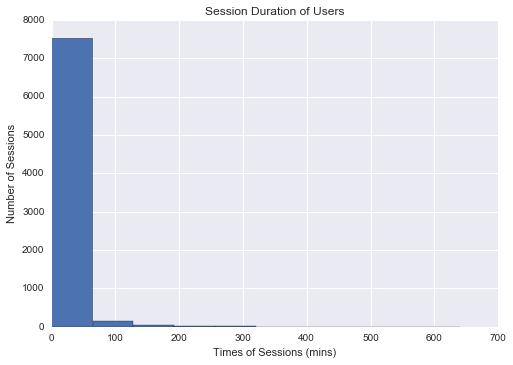

In [244]:
# create histogram

plot3 = minutes.hist()
plot3.set_title("Session Duration of Users")
plot3.set_xlabel("Times of Sessions (mins)")
plot3.set_ylabel("Number of Sessions")

## Question 5
5) Using the “ds” data:
- Determine the day of the week where users are most active.
- Summarize user activity for each day of the week using a visualization of the data.

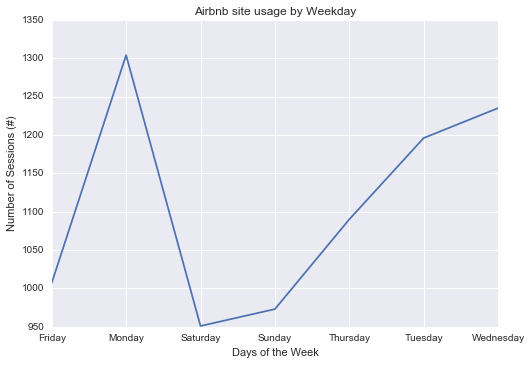

In [247]:
# Create a function, and use .apply() to call that function
# to change each element of the panda series/dataframe 

def getWeekday(date):
    day = date.weekday()
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    elif day == 6:
        return "Sunday"
        

# create a series that contains datetimes converted into weekday strings
# monday is 0, sunday is 6

weekdays = data['ds'].apply(getWeekday)
weekdays_grouped = weekdays.groupby(weekdays).size()

plot4 = weekdays_grouped.plot("line")
plot4.set_title("Airbnb site usage by Weekday")
plot4.set_xlabel("Days of the Week")
plot4.set_ylabel("Number of Sessions (#)")

In [245]:
print "Users are most active on Mondays"

Users are most active on Mondays
